# Anuran Calls

### Libraries

In [1]:
import os

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

SEED = 42

In [2]:
if not os.path.exists("./images"):
    os.mkdir("./images")

### Dataset description:

    This dataset was used in several classifications tasks related to the challenge of anuran species recognition through their calls. 
    It is a multilabel dataset with three columns of labels. 
    This dataset was created segmenting 60 audio records belonging to 4 different families, 8 genus, and 10 species. 
    Each audio corresponds to one specimen (an individual frog), the record ID is also included as an extra column.
    We used the spectral entropy and a binary cluster method to detect audio frames belonging to each syllable. 
    The segmentation and feature extraction were carried out in Matlab. 
    After the segmentation we got 7195 syllables, which became instances for train and test the classifier. 
    These records were collected in situ under real noise conditions (the background sound).
    Some species are from the campus of Federal University of Amazonas, Manaus, others from Mata Atlântica, Brazil, and one of them from Córdoba, Argentina.
    The recordings were stored in wav format with 44.1kHz of sampling frequency and 32bit of resolution, which allows us to analyze signals up to 22kHz. 
    From every extracted syllable 22 MFCCs were calculated by using 44 triangular filters.
    These coefficients were normalized between -1 ≤ mfcc ≤ 1

## 1. Data Visualization

In [2]:
df = pd.read_csv("data/Frogs_MFCCs.csv")
df

MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
0        1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1        1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2        1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3        1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4        1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...      ...       ...       ...       ...       ...       ...       ...   
7190     1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191     1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192     1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193     1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194     1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

        MFCC_8    MFCC_9   MFCC_10  ...   MFCC_17   MFCC_18   MFCC_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

       MFCC_20   MFCC_21   MFCC_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCC_1    7195 non-null   float64
 1   MFCC_2    7195 non-null   float64
 2   MFCC_3    7195 non-null   float64
 3   MFCC_4    7195 non-null   float64
 4   MFCC_5    7195 non-null   float64
 5   MFCC_6    7195 non-null   float64
 6   MFCC_7    7195 non-null   float64
 7   MFCC_8    7195 non-null   float64
 8   MFCC_9    7195 non-null   float64
 9   MFCC_10   7195 non-null   float64
 10  MFCC_11   7195 non-null   float64
 11  MFCC_12   7195 non-null   float64
 12  MFCC_13   7195 non-null   float64
 13  MFCC_14   7195 non-null   float64
 14  MFCC_15   7195 non-null   float64
 15  MFCC_16   7195 non-null   float64
 16  MFCC_17   7195 non-null   float64
 17  MFCC_18   7195 non-null   float64
 18  MFCC_19   7195 non-null   float64
 19  MFCC_20   7195 non-null   float64
 20  MFCC_21   7195 non-null   floa

    There are no missing values

In [4]:
df.duplicated().sum()

0

    There are no duplicated entries

    Drop the record identifier. 

In [5]:
df.drop(columns = "RecordID", inplace=True)

    Also drop specie and genus information. In this project I will only handle the family classification task

In [6]:
df.drop(columns = ["Genus", "Species"], inplace=True)

    Target Variable:

	Distribution: 
Leptodactylidae    0.614315
Hylidae            0.300903
Dendrobatidae      0.075330
Bufonidae          0.009451
Name: Family, dtype: float64 

	Raw Count: 
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64 



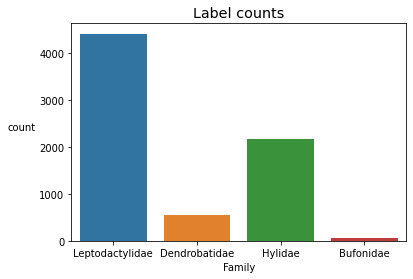

In [7]:
fig, ax = plt.subplots()
ax = sns.countplot(data=df, x="Family")
ax.set_title("Label counts", fontsize="x-large");
ax.set_ylabel("count", rotation="horizontal", ha="right")

fig.savefig("images/label_distribution.svg")

print(f'\tDistribution: \n{df["Family"].value_counts(normalize=True)} \n')
print(f'\tRaw Count: \n{df["Family"].value_counts(normalize=False)} \n')

    Attribute exploration

In [8]:
df.describe()

MFCC_1       MFCC_2       MFCC_3       MFCC_4       MFCC_5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

            MFCC_6       MFCC_7       MFCC_8       MFCC_9      MFCC_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.410417    -0.538982    -0.576506    -0.587313    -0.952266  ...   
25%       0.012581    -0.125737    -0.063109     0.004648    -0.001132  ...   
50%       0.072079    -0.052630     0.013265     0.189317     0.063478  ...   
75%       0.175957     0.085580     0.075108     0.265395     0.117725  ...   
max       0.964240     1.000000     0.551762     0.738033     0.522768  ...   

           MFCC_13      MFCC_14      MFCC_15      MFCC_16      MFCC_17  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.150945    -0.039244    -0.101748     0.042062     0.088680   
std       0.206880     0.152515     0.187618     0.119915     0.138055   
min      -0.644116    -0.590380    -0.717156    -0.498675    -0.421480   
25%      -0.002859    -0.132980    -0.255929    -0.019549    -0.001764   
50%       0.196921    -0.050715    -0.143259     0.041081     0.112769   
75%       0.324589     0.039157     0.017348     0.107046     0.201932   
max       0.945710     0.575749     0.668924     0.670700     0.681157   

           MFCC_18      MFCC_19      MFCC_20      MFCC_21      MFCC_22  
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  
mean      0.007755    -0.049474    -0.053244     0.037313     0.087567  
std       0.084733     0.082546     0.094181     0.079470     0.123442  
min      -0.759322    -0.680745    -0.361649    -0.430812    -0.379304  
25%      -0.042122    -0.106079    -0.120971    -0.017620     0.000533  
50%       0.011820    -0.052626    -0.055180     0.031274     0.105373  
75%       0.061889     0.006321     0.001342     0.089619     0.194819  
max       0.614064     0.574209     0.467831     0.389797     0.432207  

[8 rows x 22 columns]

In [9]:
family_means = df.groupby("Family").mean()
family_stds = df.groupby("Family").std(ddof=1)
family_mins = df.groupby("Family").min()
family_maxs = df.groupby("Family").max()

AttributeError: 'Figure' object has no attribute 'supylabel'

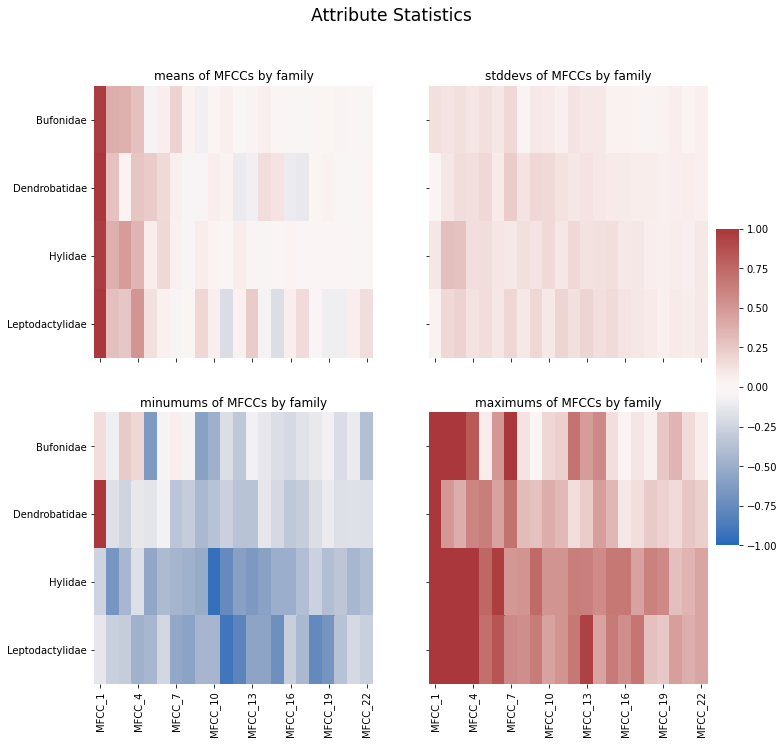

In [10]:
fig, axes = plt.subplots(2,2, figsize=(11, 11), sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

sns.heatmap(family_means, vmin=-1, vmax=1, cmap="vlag", cbar_ax=cbar_ax,
            xticklabels=3, ax=axes[0,0]);
axes[0,0].set_title("means of MFCCs by family");
axes[0,0].set_xlabel("");
axes[0,0].set_ylabel("");

sns.heatmap(family_stds, vmin=-1, vmax=1, cmap="vlag", cbar_ax=cbar_ax,
            xticklabels=3, ax=axes[0,1]);
axes[0,1].set_title("stddevs of MFCCs by family");
axes[0,1].set_xlabel("");
axes[0,1].set_ylabel("");

sns.heatmap(family_mins, vmin=-1, vmax=1, cmap="vlag", cbar_ax=cbar_ax,
            xticklabels=3, ax=axes[1,0]);
axes[1,0].set_title("minumums of MFCCs by family");
axes[1,0].set_xlabel("");
axes[1,0].set_ylabel("");

sns.heatmap(family_maxs, vmin=-1, vmax=1, cmap="vlag", cbar_ax=cbar_ax,
            xticklabels=3, ax=axes[1,1]);
axes[1,1].set_title("maximums of MFCCs by family");
axes[1,1].set_xlabel("");
axes[1,1].set_ylabel("");

fig.suptitle("Attribute Statistics", fontsize="xx-large")
fig.supylabel('Family', fontsize="x-large", rotation="horizontal", ha="right");
fig.supxlabel("MFCCs", fontsize="x-large");

#fig.savefig("images/MFCC_stats.svg")

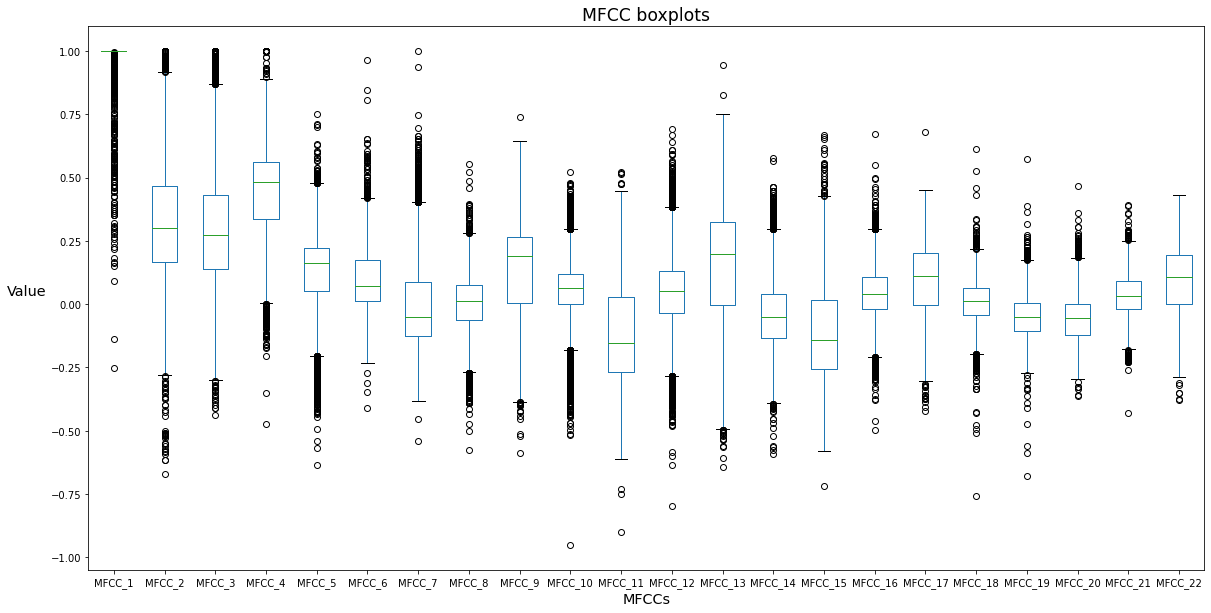

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
df.boxplot(ax=ax, grid=False);
ax.set_title("MFCC boxplots", fontsize="xx-large");
ax.set_xlabel("MFCCs", fontsize="x-large")
ax.set_ylabel("Value", fontsize="x-large", rotation="horizontal", ha="right")
fig.savefig("images/MFCC_boxplots.svg")

    Many statistical outliers, re-scaling with RobustScaler might be appropriate

In [12]:
X = df.loc[:, :"MFCC_22"]
y = df.loc[:, "Family"]

## 2. Outlier Detection

### 2.1. Boxplots

In [13]:
# univariate outlier detection through boxplots
def get_boxplot_outliers(df: pd.DataFrame, return_mask=False)-> pd.DataFrame :
    q25 = df.quantile(0.25)
    q75 = df.quantile(0.75)
    iqr = q75 - q25
    low = q25 - 1.5 * iqr
    high = q75 + 1.5 * iqr
    outlier_mask = (((df < low) | (df > high)).sum(axis=1) > 0)  # any column outside the [low: high] range
    
    if return_mask:
        return outlier_mask
    else:
        return df[outlier_mask]

In [14]:
n_entries = df.shape[0]
univariate_outliers = get_boxplot_outliers(df)
print(f'\tBoxplots')
print(f'univariate outlier count: {univariate_outliers.shape[0]}')
print(f'univariate outlier percentage: {univariate_outliers.shape[0] / n_entries :.3f}')

	Boxplots
univariate outlier count: 1779
univariate outlier percentage: 0.247


#### 2.2. iForest

In [15]:
iForest = IsolationForest(contamination="auto", random_state=SEED)
iForest.fit(X)
as_I = 0.5 - iForest.decision_function(X)  # anomaly scores, as defined in the original paper
print(f'{1 - (as_I > 0.5).sum() / as_I.size}')
print(f'{1 - (as_I > 0.55).sum() / as_I.size}')

0.8985406532314107
0.9680333564975677


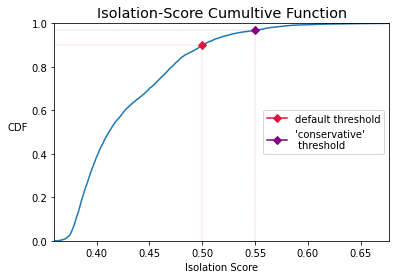

In [16]:
fig, ax = plt.subplots(figsize=(6,4))

ylim = (0, 1)
xlim = (as_I.min(), as_I.max())

ax.plot(np.sort(as_I), np.linspace(0, 1, as_I.size))

ax.plot([0.5, 0.5], [0, 0.9], color="crimson", linewidth=0.3, linestyle="dotted")
ax.plot([0, 0.5], [0.9, 0.9], color="crimson", linewidth=0.3, linestyle="dotted")
ax.plot([0.5], [0.9], marker="D", color="crimson", label="default threshold")

ax.plot([0.55, 0.55], [0, 0.968], color="purple", linewidth=0.3, linestyle="dotted")
ax.plot([0, 0.55], [0.968, 0.968], color="purple", linewidth=0.3, linestyle="dotted")
ax.plot([0.55], [0.968], marker="D", color="purple", label="'conservative' \n threshold")

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_title("Isolation-Score Cumultive Function", fontsize="x-large")
ax.set_ylabel("CDF", rotation="horizontal", ha="right")
ax.set_xlabel("Isolation Score");
ax.legend(loc="right");

fig.savefig("images/iForest_scores.svg")

### 2.3. Local Outlier Factor

In [17]:
lof = LocalOutlierFactor()
outlier_labels = lof.fit_predict(X)
as_O = - lof.negative_outlier_factor_  # LOF as defined in the original paper
print(f'{1 - (as_O > 1.5).sum() / as_O.size}')
print(f'{1 - (as_O > 2).sum() / as_O.size}')

0.9328700486448923
0.9767894371091036


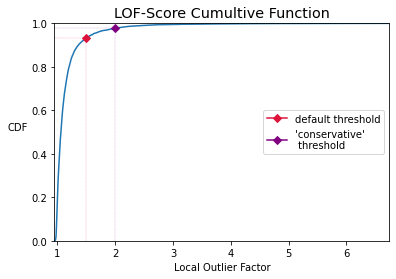

In [18]:
fig, ax = plt.subplots(figsize=(6,4))

ylim = (0, 1)
xlim = (as_O.min(), as_O.max())

ax.plot(np.sort(as_O), np.linspace(0, 1, as_O.size))

ax.plot([1.5, 1.5], [0, 0.933], color="crimson", linewidth=0.3, linestyle="dotted")
ax.plot([0, 1.5], [0.933, 0.933], color="crimson", linewidth=0.3, linestyle="dotted")
ax.plot([1.5], [0.933], marker="D", color="crimson", label="default threshold")

ax.plot([2, 2], [0, 0.977], color="purple", linewidth=0.3, linestyle="dotted")
ax.plot([0, 2], [0.977, 0.977], color="purple", linewidth=0.3, linestyle="dotted")
ax.plot([2], [0.977], marker="D", color="purple", label="'conservative' \n threshold")

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_title("LOF-Score Cumultive Function", fontsize="x-large")
ax.set_ylabel("CDF", rotation="horizontal", ha="right")
ax.set_xlabel("Local Outlier Factor");
ax.legend(loc="right");

fig.savefig("images/LOF_scores.svg")

In [19]:
ob = get_boxplot_outliers(X, return_mask=True)
oi = as_I > 0.5
oo = as_O > 1.5
outlier_mask = ( (oo & oi) & ~( (y == "Bufonidae") | (y == "Dendrobatidae") ) ) | \
               ( ( (as_I > 0.55) & (as_O > 2) ) & ( (y == "Bufonidae") | (y == "Dendrobatidae") ) )

In [20]:
ob.mean(), oi.mean(), (as_I > 0.55).mean(), oo.mean(), (as_O > 2).mean(), outlier_mask.mean()

(0.2472550382209868,
 0.1014593467685893,
 0.031966643502432245,
 0.06712995135510771,
 0.023210562890896454,
 0.02404447533009034)

In [21]:
print(f'\t Boxplots:\n{df[ob]["Family"].value_counts()}\n')
print(f'\t iForest:\n{df[oi]["Family"].value_counts()}\n')
print(f'\t iForest (as_I > 0.55):\n{df[as_I > 0.55]["Family"].value_counts()}\n')
print(f'\t LOF:\n{df[oo]["Family"].value_counts()}\n')
print(f'\t LOF (as_O > 2):\n{df[as_O > 2]["Family"].value_counts()}\n')
print(f'\t iForest, LOF (*):\n{df[outlier_mask]["Family"].value_counts()}\n')

	 Boxplots:
Leptodactylidae    875
Hylidae            744
Dendrobatidae      150
Bufonidae           10
Name: Family, dtype: int64

	 iForest:
Hylidae            352
Leptodactylidae    295
Dendrobatidae       75
Bufonidae            8
Name: Family, dtype: int64

	 iForest (as_I > 0.55):
Hylidae            97
Leptodactylidae    88
Dendrobatidae      41
Bufonidae           4
Name: Family, dtype: int64

	 LOF:
Hylidae            283
Leptodactylidae    167
Bufonidae           17
Dendrobatidae       16
Name: Family, dtype: int64

	 LOF (as_O > 2):
Hylidae            102
Leptodactylidae     48
Bufonidae           12
Dendrobatidae        5
Name: Family, dtype: int64

	 iForest, LOF (*):
Hylidae            91
Leptodactylidae    77
Bufonidae           4
Dendrobatidae       1
Name: Family, dtype: int64



### 2.4. t-SNE

In [22]:
tSNE = TSNE(random_state=SEED, perplexity=20)
data_2D = tSNE.fit_transform(X)
df_2D = pd.DataFrame(data=data_2D, columns=["e1", "e2"])

AttributeError: 'Figure' object has no attribute 'supylabel'

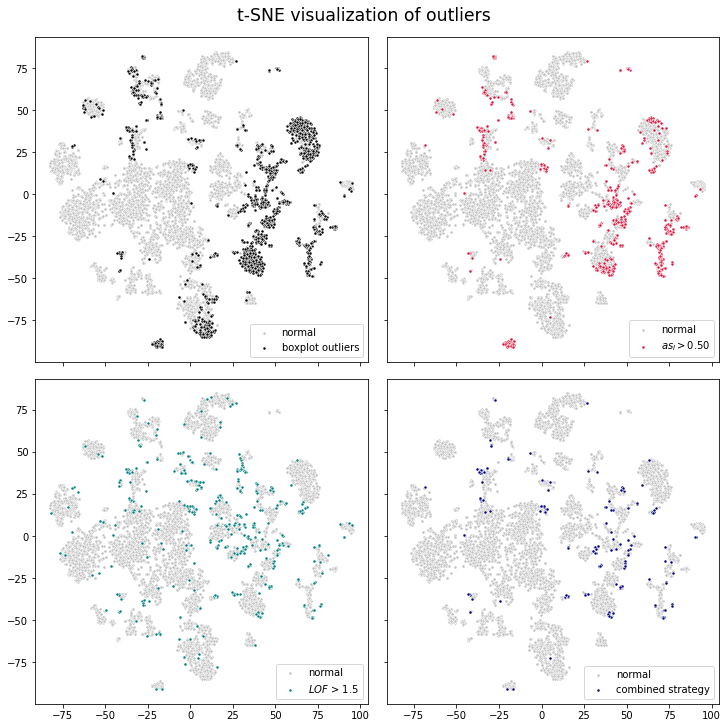

In [23]:
gray = np.ones(X.shape[0], dtype=bool)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True, constrained_layout=True)

sns.scatterplot(data=df_2D[gray & ~ob], x="e1", y="e2", color="silver", marker=".", ax=axes[0, 0], label="normal")
sns.scatterplot(data=df_2D[ob], x="e1", y="e2", color="black", marker=".", ax=axes[0,0], label="boxplot outliers")
axes[0,0].legend(loc="lower right")
axes[0,0].set_ylabel("")

sns.scatterplot(data=df_2D[gray & ~oi], x="e1", y="e2", color="silver", marker=".", ax=axes[0, 1], label="normal")
sns.scatterplot(data=df_2D[oi], x="e1", y="e2", color="crimson", marker=".", ax=axes[0, 1], label="$as_I > 0.50$")
axes[0,1].legend(loc="lower right")

sns.scatterplot(data=df_2D[gray & ~oo], x="e1", y="e2", color="silver", marker=".", ax=axes[1, 0], label="normal")
sns.scatterplot(data=df_2D[oo], x="e1", y="e2", color="teal", marker=".", ax=axes[1, 0], label="$LOF$ > 1.5")
axes[1,0].legend(loc="lower right")
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.scatterplot(data=df_2D[gray & ~outlier_mask], x="e1", y="e2", color="silver", marker=".", ax=axes[1, 1], label="normal")
sns.scatterplot(data=df_2D[outlier_mask], x="e1", y="e2", color="navy", marker=".", ax=axes[1, 1], label="combined strategy")
axes[1,1].legend(loc="lower right")
axes[1,1].set_xlabel("")


fig.suptitle("t-SNE visualization of outliers", fontsize="xx-large")
fig.supylabel("e1", fontsize="x-large", rotation="horizontal", ha="right");
fig.supxlabel("e2", fontsize="x-large", va="baseline");

#fig.savefig("images/tSNE_outliers.svg")

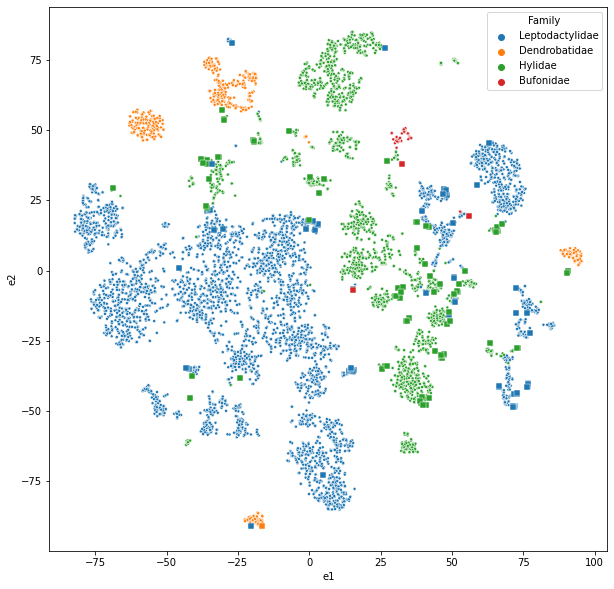

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=df_2D[~outlier_mask], x="e1", y="e2", hue=y, marker=".");
sns.scatterplot(data=df_2D[outlier_mask], x="e1", y="e2", hue=y, marker="s", label="outliers", legend=False);

    Data Cleaning

In [25]:
df[~outlier_mask].to_csv("data/cleaned_MFCCs.csv", index=False)

### 3. Feature Correlation

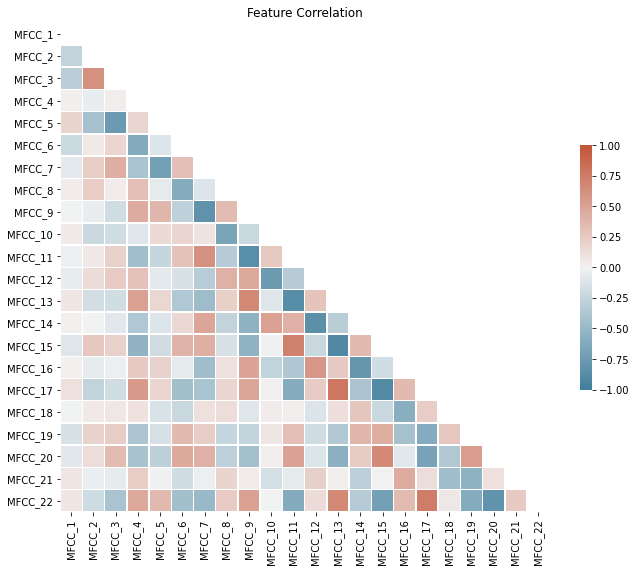

In [26]:
correlation_matrix = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the upper triangle
triangle_mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=+1, mask=triangle_mask, cmap=cmap, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation")

fig.savefig("images/feature_correlation.svg")

    There are some strong correlations between features. 
    Performing PCA would decorrelate them

### 4. PCA

Cumulative Variance Explained: [0.32713636 0.52204898 0.64865158 0.73091131 0.80001109 0.84318941
 0.87747252 0.9075409  0.92646132 0.94156885 0.95400241 0.96425382
 0.9734146  0.98165744 0.98785441 0.99340059 0.99594022 0.9977531
 0.99878201 0.99938973 0.999715   1.        ]


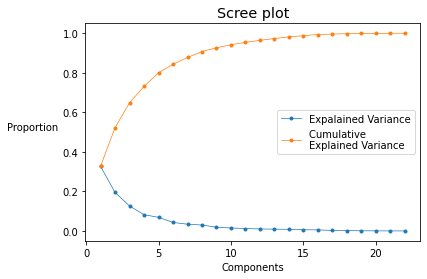

In [27]:
scaler = RobustScaler()  # scaling is necessary for PCA. RobustScaler to reduce the effects of outliers
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
pve = pca.explained_variance_ratio_
cve = np.cumsum(pve)

fig, ax = plt.subplots()
ax.plot(np.arange(1, pve.size+1), pve, marker=".", linewidth=0.7, label="Expalained Variance");
ax.plot(np.arange(1, pve.size+1), cve, marker=".", linewidth=0.7, label="Cumulative \nExplained Variance");
ax.legend();
ax.set_title("Scree plot", fontsize="x-large")
ax.set_ylabel("Proportion", rotation="horizontal", ha="right")
ax.set_xlabel("Components")

fig.savefig("images/PCA.svg")

print(f"Cumulative Variance Explained: {cve}")  # {n_components: cve}:{(8: 90%), (11: 95%), (16: 99%)}